# **Premiere League**

The main goal of this notebooks is to see how much our team change  the last three years. Before we start, it's important to note that this is just a copy/past of the example taken from here. And most important let's remember what George Box said: **"All models are wrong, but some are useful"**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
import pymc3 as pm
import theano.tensor as tt
from matplotlib.ticker import StrMethodFormatter
import arviz as az

plt.style.use(style='fivethirtyeight')

Like cooking we can't do nothing without ingredient so let's get some ingredients. Here our ingredients, obviously, will be the results of all matches of the last three season.

In [2]:
df = pd.read_csv('data/epl-2019-GMT3.csv')

**1. EDA**

Let's do some exploratory data analisys.

In [3]:
df.head(5)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,09/08/2019 22:00,Anfield,Liverpool,Norwich,4 - 1
1,2,1,10/08/2019 14:30,London Stadium,West Ham,Man City,0 - 5
2,3,1,10/08/2019 17:00,Vitality Stadium,Bournemouth,Sheffield Utd,1 - 1
3,4,1,10/08/2019 17:00,Turf Moor,Burnley,Southampton,3 - 0
4,5,1,10/08/2019 17:00,Selhurst Park,Crystal Palace,Everton,0 - 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match Number  380 non-null    int64 
 1   Round Number  380 non-null    int64 
 2   Date          380 non-null    object
 3   Location      380 non-null    object
 4   Home Team     380 non-null    object
 5   Away Team     380 non-null    object
 6   Result        380 non-null    object
dtypes: int64(2), object(5)
memory usage: 20.9+ KB


 - **Let's see who score the most first**


In [5]:
# get home score
def get_home_score(res):
    return res.split(' ')[0]

df['Home score'] = df['Result'].apply(lambda x: get_home_score(x))

In [6]:
df.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Home score
0,1,1,09/08/2019 22:00,Anfield,Liverpool,Norwich,4 - 1,4
1,2,1,10/08/2019 14:30,London Stadium,West Ham,Man City,0 - 5,0
2,3,1,10/08/2019 17:00,Vitality Stadium,Bournemouth,Sheffield Utd,1 - 1,1
3,4,1,10/08/2019 17:00,Turf Moor,Burnley,Southampton,3 - 0,3
4,5,1,10/08/2019 17:00,Selhurst Park,Crystal Palace,Everton,0 - 0,0


In [7]:
# get the away score
def get_away_score(res):
    return res.split(' ')[2]

df['Away score'] = df['Result'].apply(lambda x: get_away_score(x))

In [8]:
df.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Home score,Away score
0,1,1,09/08/2019 22:00,Anfield,Liverpool,Norwich,4 - 1,4,1
1,2,1,10/08/2019 14:30,London Stadium,West Ham,Man City,0 - 5,0,5
2,3,1,10/08/2019 17:00,Vitality Stadium,Bournemouth,Sheffield Utd,1 - 1,1,1
3,4,1,10/08/2019 17:00,Turf Moor,Burnley,Southampton,3 - 0,3,0
4,5,1,10/08/2019 17:00,Selhurst Park,Crystal Palace,Everton,0 - 0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match Number  380 non-null    int64 
 1   Round Number  380 non-null    int64 
 2   Date          380 non-null    object
 3   Location      380 non-null    object
 4   Home Team     380 non-null    object
 5   Away Team     380 non-null    object
 6   Result        380 non-null    object
 7   Home score    380 non-null    object
 8   Away score    380 non-null    object
dtypes: int64(2), object(7)
memory usage: 26.8+ KB


As we can see 'Home score' and 'Away score' are object. We need to convert them into integer.

In [10]:
df['Home score'] = df['Home score'].apply(lambda x: int(x))
df['Away score'] = df['Away score'].apply(lambda x: int(x))


# Who score the most at home?

Text(0, 0.5, 'Team')

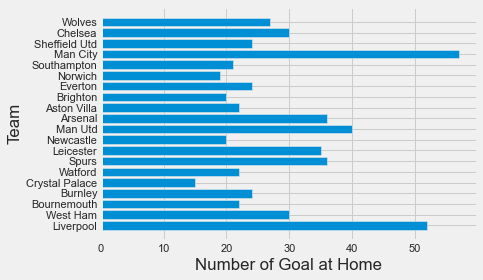

In [11]:
# A graph will be more explicit
x = []
y = []

#Get the name of the team
for i in df['Home Team'].unique():
    y.append(i)
    
#Get the number of the home goal of each team
for i in range(0,20):
    x.append(np.sum(df[df['Home Team'] == y[i]]['Home score']))
    
plt.barh(y, x)
plt.xlabel('Number of Goal at Home')
plt.ylabel('Team')
    

As we can see 'Manchester city' and 'Liverpool' are out of the league, we can see that they scored more than 50 goals at home for the 2019-2020 campaign.

# Who score the most away?

Text(0, 0.5, 'Team')

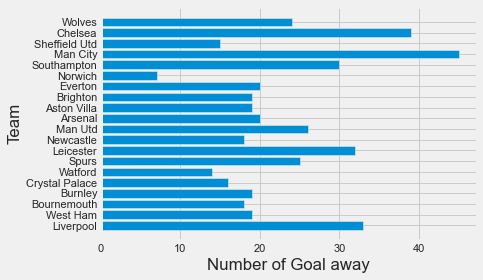

In [12]:
# we can do the same as before

xa = []
ya = []

for i in df['Home Team'].unique():
    ya.append(i)
    
for i in range(0, 20):
    xa.append(np.sum(df[df['Away Team'] == ya[i]]['Away score']))
    
plt.barh(ya, xa)
plt.xlabel('Number of Goal away')
plt.ylabel('Team')

This time 4 teams exceed, but still 'Liverpool' and 'Manchester city' are one of them. 

# Who is the champions?

As we can see the data don't say who was the winner for this campaign. Obviously we know who was the winner but let's pretend we don't know and try to find who was the winner.

In [13]:
# let's put the result in a Serie
points = pd.Series(0, index = ya)
points

Liverpool         0
West Ham          0
Bournemouth       0
Burnley           0
Crystal Palace    0
Watford           0
Spurs             0
Leicester         0
Newcastle         0
Man Utd           0
Arsenal           0
Aston Villa       0
Brighton          0
Everton           0
Norwich           0
Southampton       0
Man City          0
Sheffield Utd     0
Chelsea           0
Wolves            0
dtype: int64

Just in case you don't know, through the campaign if a team win they get 3 points, if they lose they get only 0 points and for a draw the two team got 1 point each.

In [14]:
for i in range(0, 379):
    if df['Home score'][i] > df['Away score'][i]:
        points[df['Home Team'][i]] = points[df['Home Team'][i]] + 3
    elif df['Home score'][i] == df['Away score'][i]:
        points[df['Home Team'][i]] = points[df['Home Team'][i]] + 1
        points[df['Away Team'][i]] = points[df['Away Team'][i]] + 1
    else:
        points[df['Away Team'][i]] = points[df['Away Team'][i]] + 3

And the winner was...

In [15]:
points

Liverpool         99
West Ham          38
Bournemouth       34
Burnley           54
Crystal Palace    43
Watford           34
Spurs             59
Leicester         62
Newcastle         44
Man Utd           66
Arsenal           56
Aston Villa       34
Brighton          41
Everton           49
Norwich           21
Southampton       52
Man City          81
Sheffield Utd     54
Chelsea           66
Wolves            59
dtype: int64

## Ok, it's time for lunch now...

In this notebook we'll just repoduce the model taken from here. We'll just estimate the strength of a team  based on their scoring intensity.

In [16]:
teams = df['Home Team'].unique()
teams = pd.DataFrame(teams, columns=['Team'])
teams['i'] = teams.index
teams.head()

,Team,i
0,Liverpool,0
1,West Ham,1
2,Bournemouth,2
3,Burnley,3
4,Crystal Palace,4


In [17]:
df1 = df[['Home Team', 'Away Team', 'Home score', 'Away score']]

In [18]:
df1.head()

,Home Team,Away Team,Home score,Away score
0,Liverpool,Norwich,4,1
1,West Ham,Man City,0,5
2,Bournemouth,Sheffield Utd,1,1
3,Burnley,Southampton,3,0
4,Crystal Palace,Everton,0,0


In [19]:
df1 = pd.merge(df1, teams, left_on='Home Team', right_on='Team', how='left')
df1 = df1.rename(columns={"i": "i_home"}).drop('Team', 1)
df1 = pd.merge(df1, teams, left_on='Away Team', right_on='Team', how='left')
df1 = df1.rename(columns={"i": "i_away"}).drop('Team', 1)

In [21]:
df1.sample(5)

,Home Team,Away Team,Home score,Away score,i_home,i_away
122,Arsenal,Southampton,2,2,10,15
322,Man Utd,Bournemouth,5,2,9,2
229,Bournemouth,Brighton,3,1,2,12
58,Arsenal,Aston Villa,3,2,10,11
215,Wolves,Newcastle,1,1,19,8


In [22]:
observed_home_goals = df1['Home score'].values
observed_away_goals = df1['Away score'].values

home_team = df1['i_home'].values
away_team = df1['i_away'].values

num_teams = len(df1['i_home'].drop_duplicates())
num_games = len(home_team)

# **Building the model**

In [23]:
with pm.Model() as model:
    #goal model parameters
    home = pm.Flat('home')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sigma=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sigma=2.5)
    intercept = pm.Flat('intercept')
    
    # team-specific model parameters
    atts_star = pm.Normal('atts_star', mu=0, sigma=sd_att, shape=num_teams)
    defs_star = pm.Normal('defs_star', mu=0, sigma=sd_def, shape=num_teams)
    
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])
    
    
    #likelihood of observed data
    home_points = pm.Poisson('home_points', mu = home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu = away_theta, observed=observed_away_goals)
    

C:\Users\Kaien\miniconda3\envs\mypm3env\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 84 seconds.


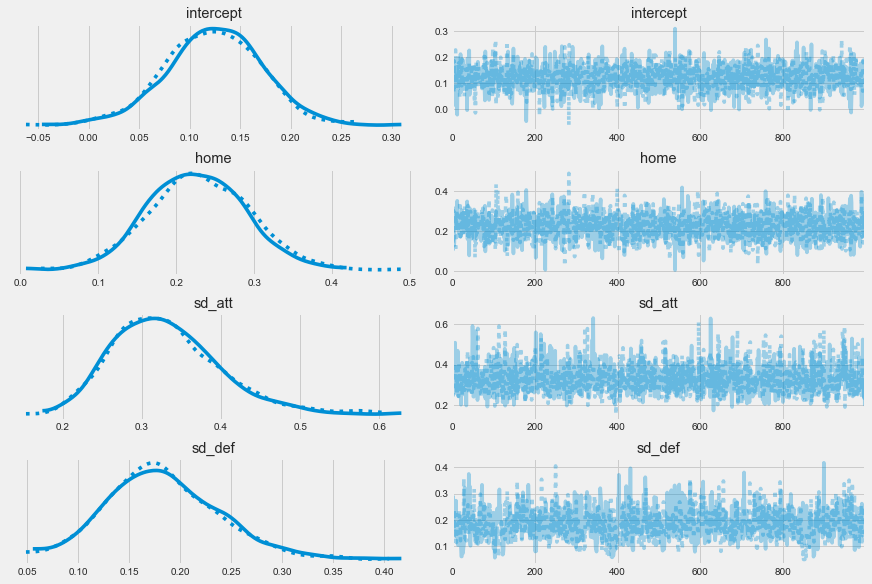

In [24]:
with model:
    trace = pm.sample(1000, tune=1000)
    az.plot_trace(trace, var_names=['intercept', 'home', 'sd_att', 'sd_def'])

In [25]:
bfmi = np.max(az.bfmi(trace))
bfmi

C:\Users\Kaien\miniconda3\envs\mypm3env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


0.9474530853266102

In [26]:
with model:    
    max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace).values()).values
max_gr

array(1.00634609)

In [27]:
with model:
    print(az.hdi(trace["atts"]))

[[ 0.28013394  0.67169013]
 [-0.27007598  0.22788019]
 [-0.41248462  0.06613832]
 [-0.36926736  0.1158497 ]
 [-0.62414242 -0.09035488]
 [-0.51636267  0.01536697]
 [-0.04550399  0.39054744]
 [ 0.04273816  0.47168248]
 [-0.48400599  0.04015752]
 [ 0.01164912  0.4591198 ]
 [-0.11467678  0.30710721]
 [-0.39144172  0.10920834]
 [-0.4419398   0.05398656]
 [-0.33701499  0.15258669]
 [-0.78872653 -0.19952327]
 [-0.18969583  0.26758134]
 [ 0.45095012  0.82798837]
 [-0.47351486  0.03652122]
 [ 0.07703659  0.51416243]
 [-0.23054563  0.22581832]]


C:\Users\Kaien\miniconda3\envs\mypm3env\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


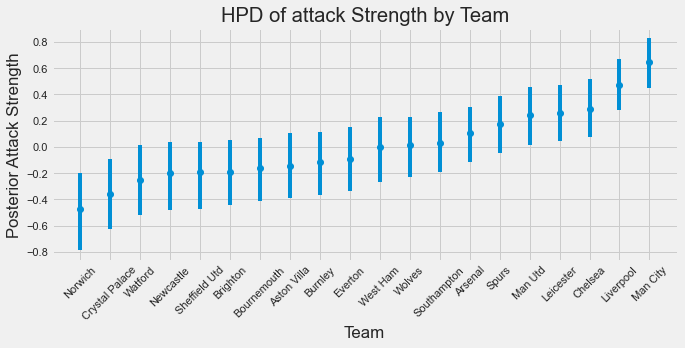

In [28]:
df_hpd = pd.DataFrame(az.hdi(trace['atts']), columns=["hpd_low", "hpd_high"], index=teams['Team'].values)

df_median = pd.DataFrame(np.quantile(trace['atts'], 0.5, axis=0), columns=['hpd_median'], index=teams['Team'].values)

df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high  - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + 0.5 

fig, axs = plt.subplots(figsize=(10, 4))
axs.errorbar(df_hpd.x,
            df_hpd.hpd_median,
            yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T, fmt='o')
axs.set_title('HPD of attack Strength by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Attack Strength')
_ = axs.set_xticks(df_hpd.index + 0.5)
_ = axs.set_xticklabels(df_hpd['index'].values, rotation=45)

In [29]:
points.sort_values(ascending=False)

Liverpool         99
Man City          81
Chelsea           66
Man Utd           66
Leicester         62
Spurs             59
Wolves            59
Arsenal           56
Burnley           54
Sheffield Utd     54
Southampton       52
Everton           49
Newcastle         44
Crystal Palace    43
Brighton          41
West Ham          38
Watford           34
Aston Villa       34
Bournemouth       34
Norwich           21
dtype: int64

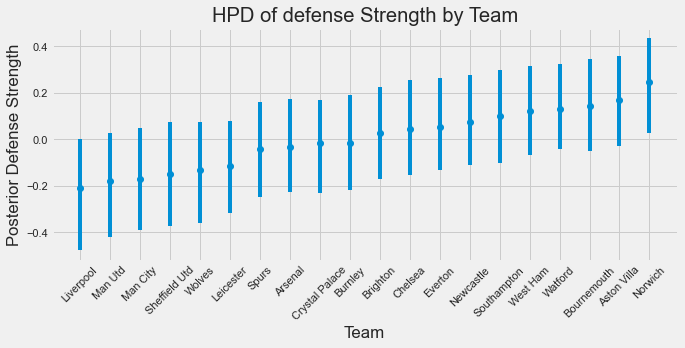

In [38]:
df_hpd = pd.DataFrame(az.hdi(trace['defs']), columns=["hpd_low", "hpd_high"], index=teams['Team'].values)

df_median = pd.DataFrame(np.quantile(trace['defs'], 0.5, axis=0), columns=['hpd_median'], index=teams['Team'].values)

df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high  - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + 0.5 

fig, axs = plt.subplots(figsize=(10, 4))
axs.errorbar(df_hpd.x,
            df_hpd.hpd_median,
            yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T, fmt='o')
axs.set_title('HPD of defense Strength by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Defense Strength')
_ = axs.set_xticks(df_hpd.index + 0.5)
_ = axs.set_xticklabels(df_hpd['index'].values, rotation=45)

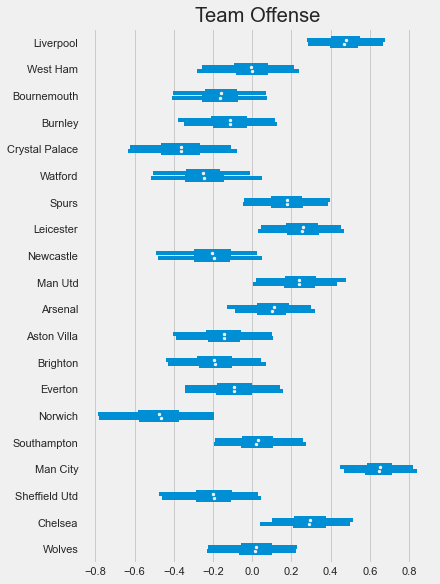

In [33]:
with model:
    ax = az.plot_forest(trace, var_names=['atts'])
    ax[0].set_yticklabels(teams.iloc[::-1]['Team'].tolist())
    ax[0].set_title('Team Offense')

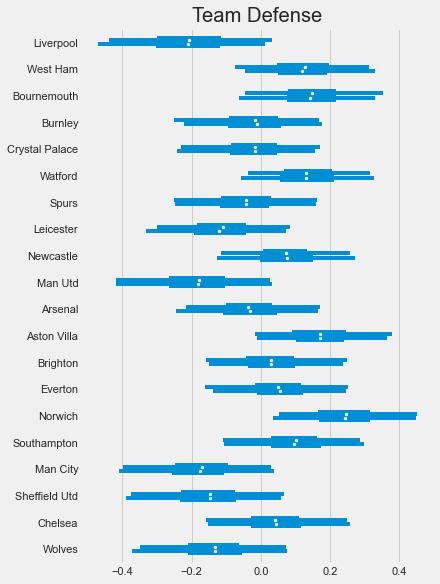

In [31]:
with model:
    ax = az.plot_forest(trace, var_names=['defs'])
    ax[0].set_yticklabels(teams.iloc[::-1]['Team'].tolist())
    ax[0].set_title('Team Defense')

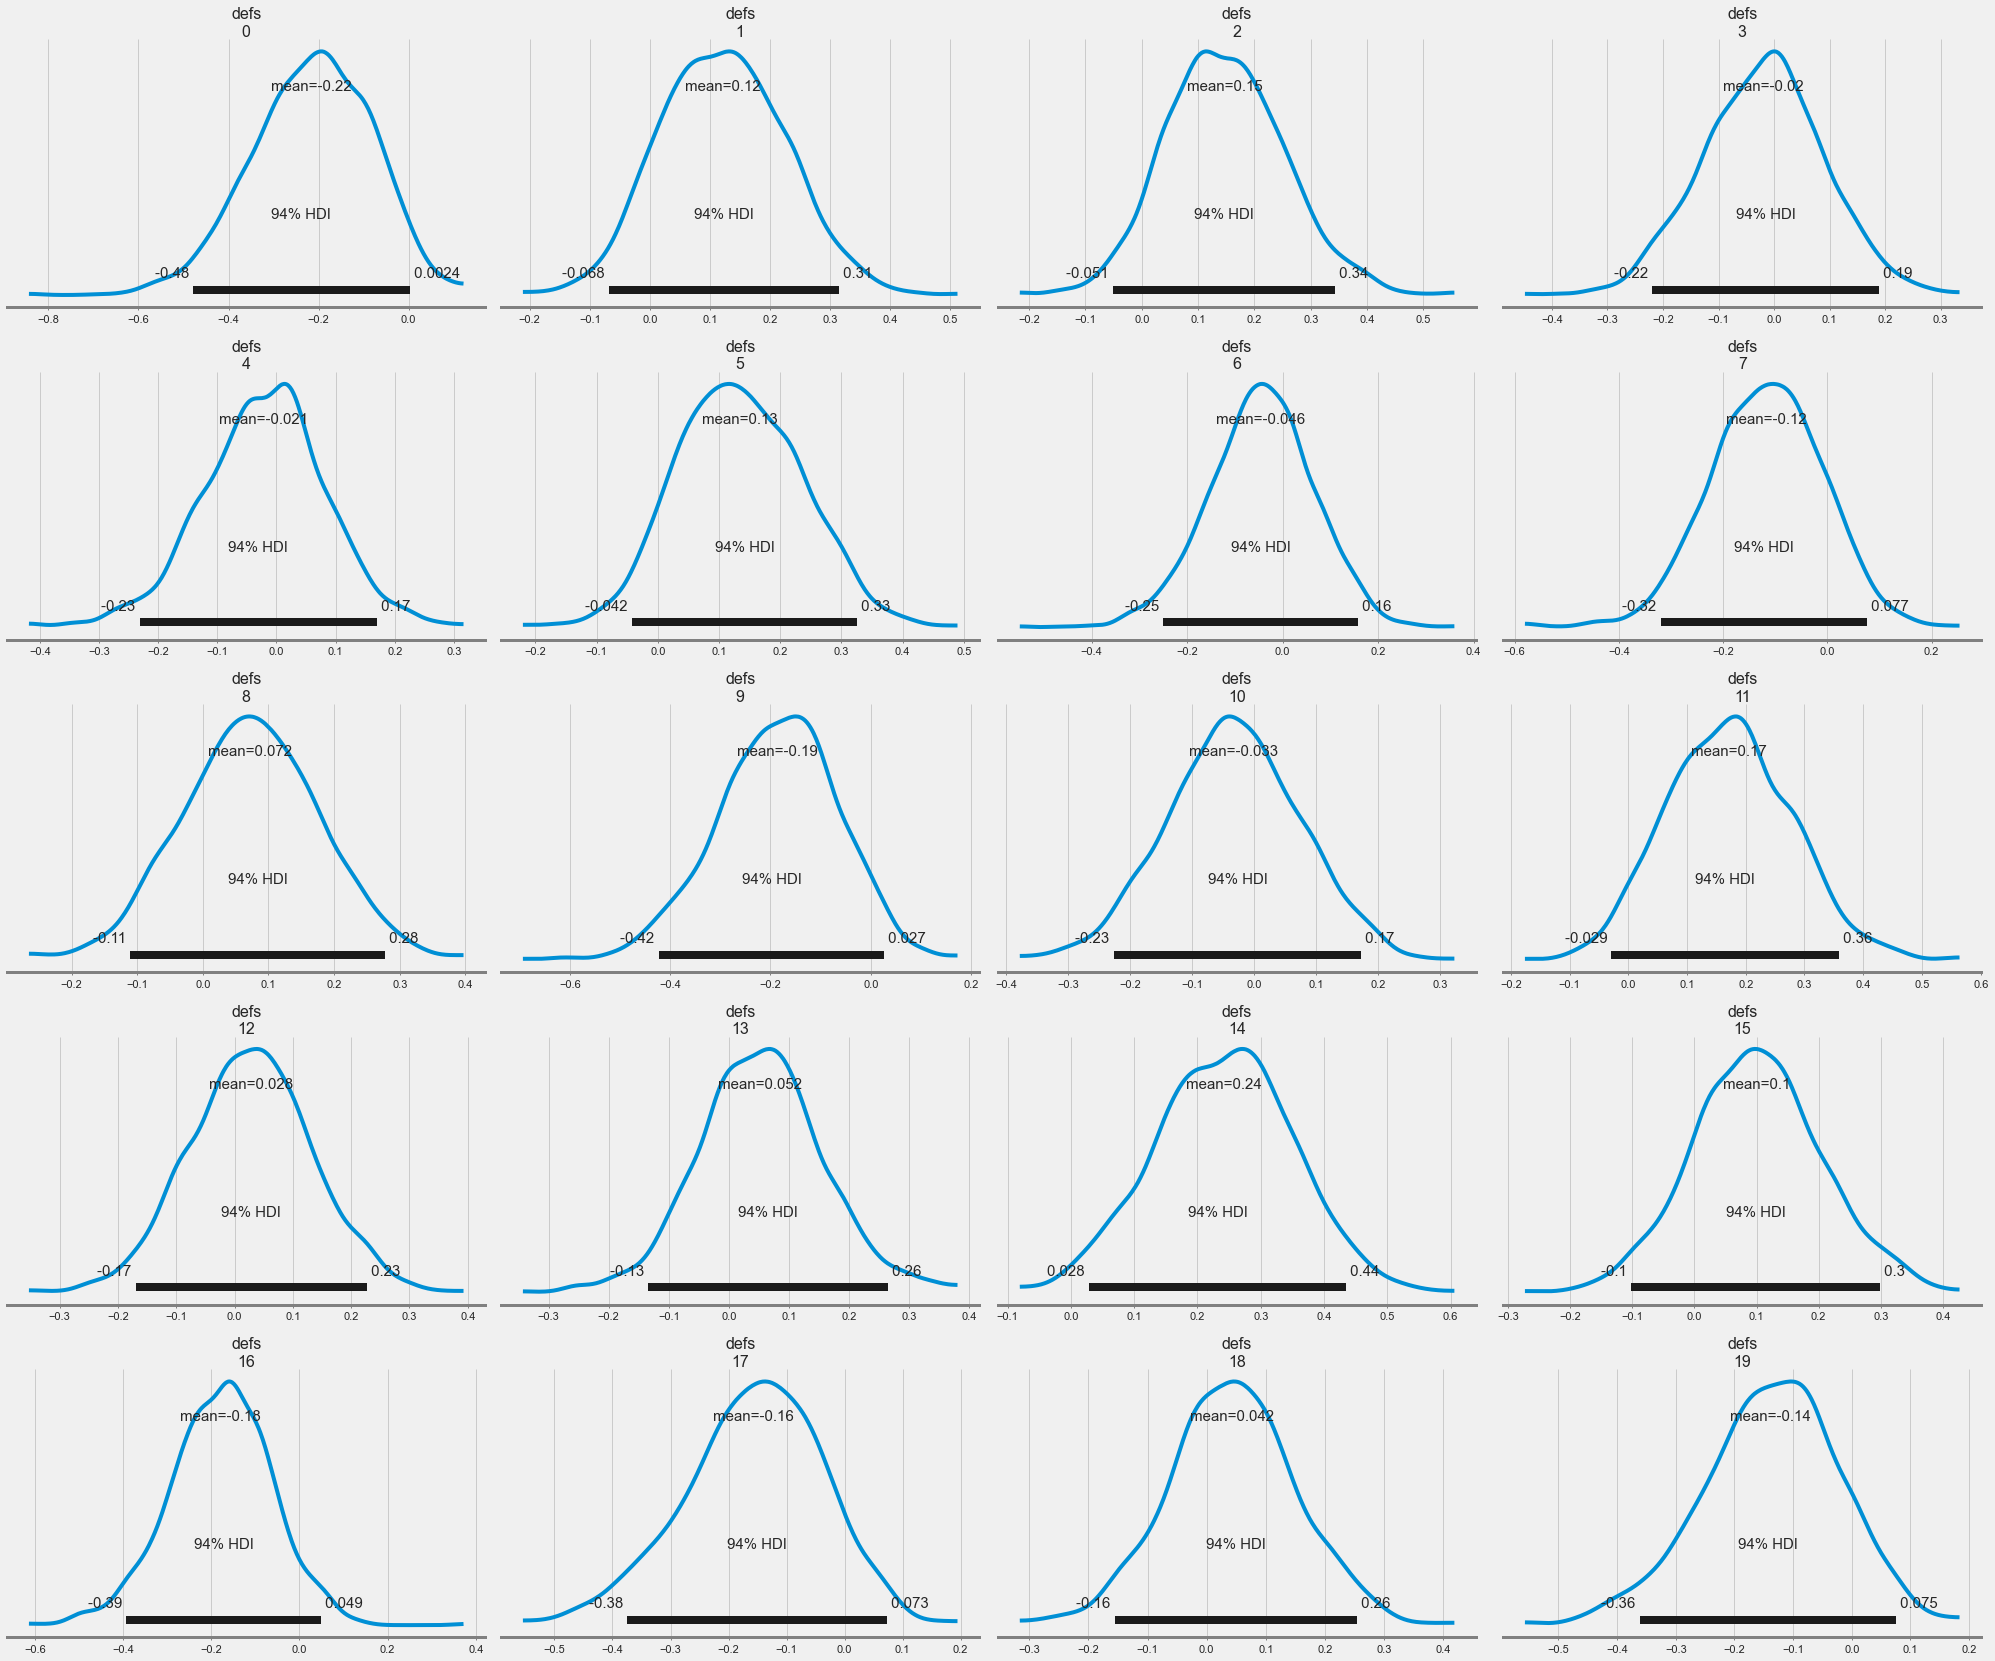

In [32]:
with model:
    az.plot_posterior(trace, var_names=['defs'])

In [2]:
print(f'First try')

First try


In [4]:
print('This is my feature')

This is my feature
